In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

Import book sales dataset, and have a quick plot of columns:

In [12]:
book_sales = pd.read_csv('C:/Users/Lenovo/Desktop/TSA_Kaggle/book_sales.csv', index_col=['Date'], parse_dates=True)
book_sales.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


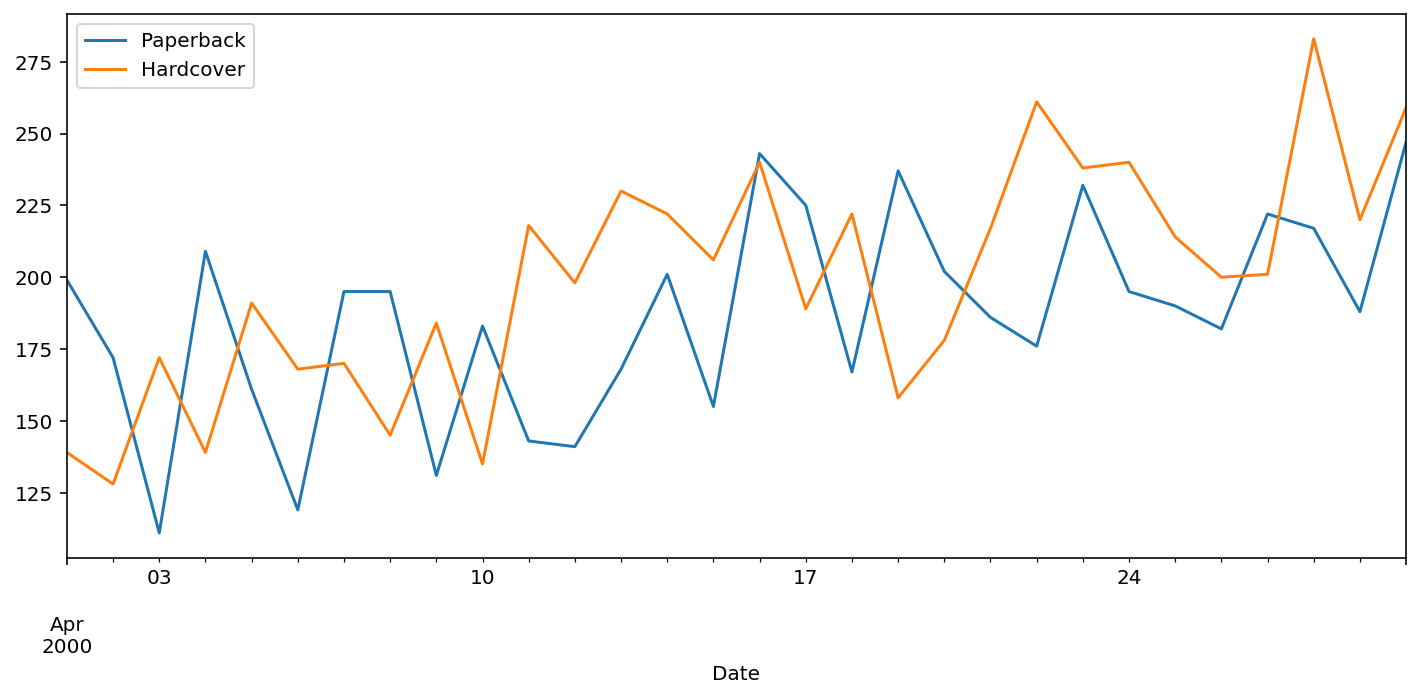

In [13]:
ax = book_sales.Paperback.plot(figsize=(12, 5))
book_sales.Hardcover.plot()

ax.legend()

Create time step column:

In [14]:
book_sales['time'] = np.arange(len(book_sales.index))
book_sales.head()

,Paperback,Hardcover,time
Date,,,
2000-04-01,199,139,0
2000-04-02,172,128,1
2000-04-03,111,172,2
2000-04-04,209,139,3
2000-04-05,161,191,4


Plot linear regression of Paperback with sns.regplot:

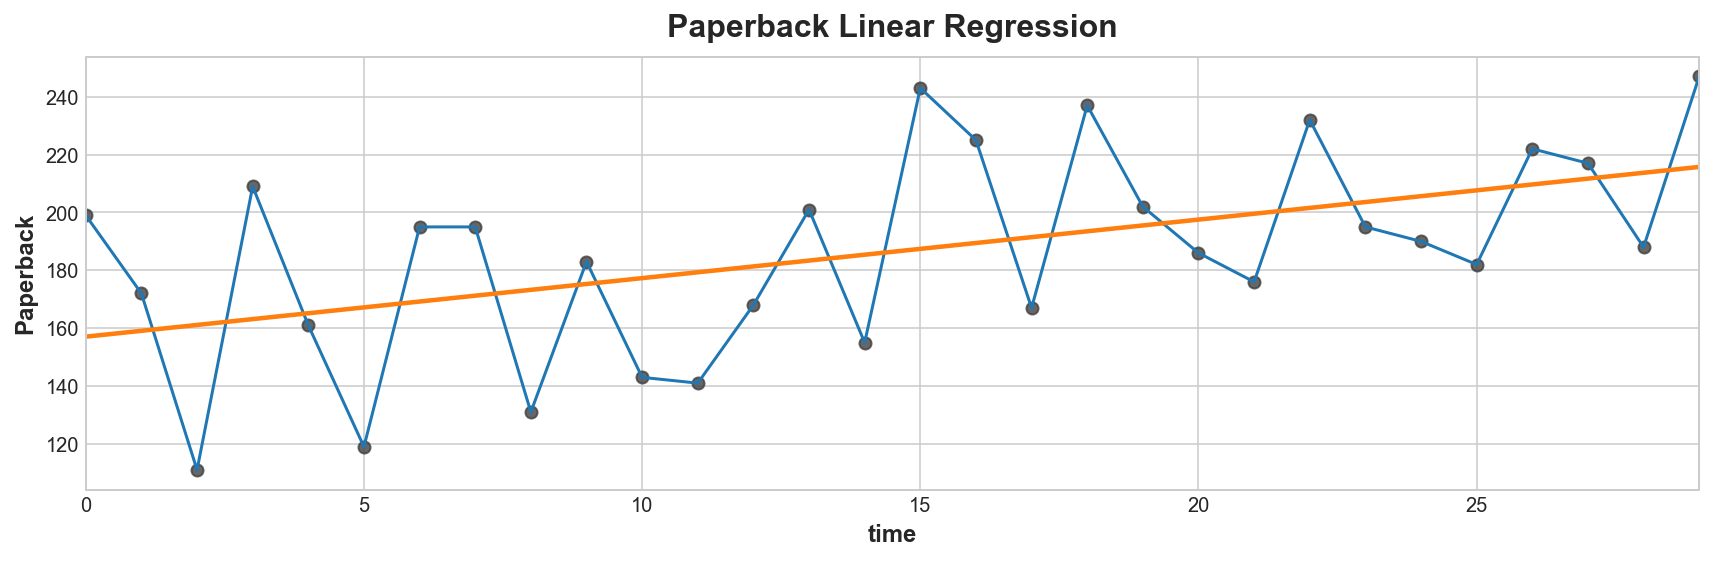

In [15]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(12, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

fig, ax = plt.subplots()
ax.plot('time', 'Paperback', data=book_sales)
sns.regplot(x='time', y='Paperback', data=book_sales, ci=None, scatter_kws=dict(color='0.25'));
ax.set(title='Paperback Linear Regression');

Add a column of one lagged values of Hardcover column, and compare it with original Hardcover column:

In [16]:
book_sales['h_lag'] =  book_sales.Hardcover.shift(1)
book_sales.head()

,Paperback,Hardcover,time,h_lag
Date,,,,
2000-04-01,199,139,0,NaN
2000-04-02,172,128,1,139.0
2000-04-03,111,172,2,128.0
2000-04-04,209,139,3,172.0
2000-04-05,161,191,4,139.0


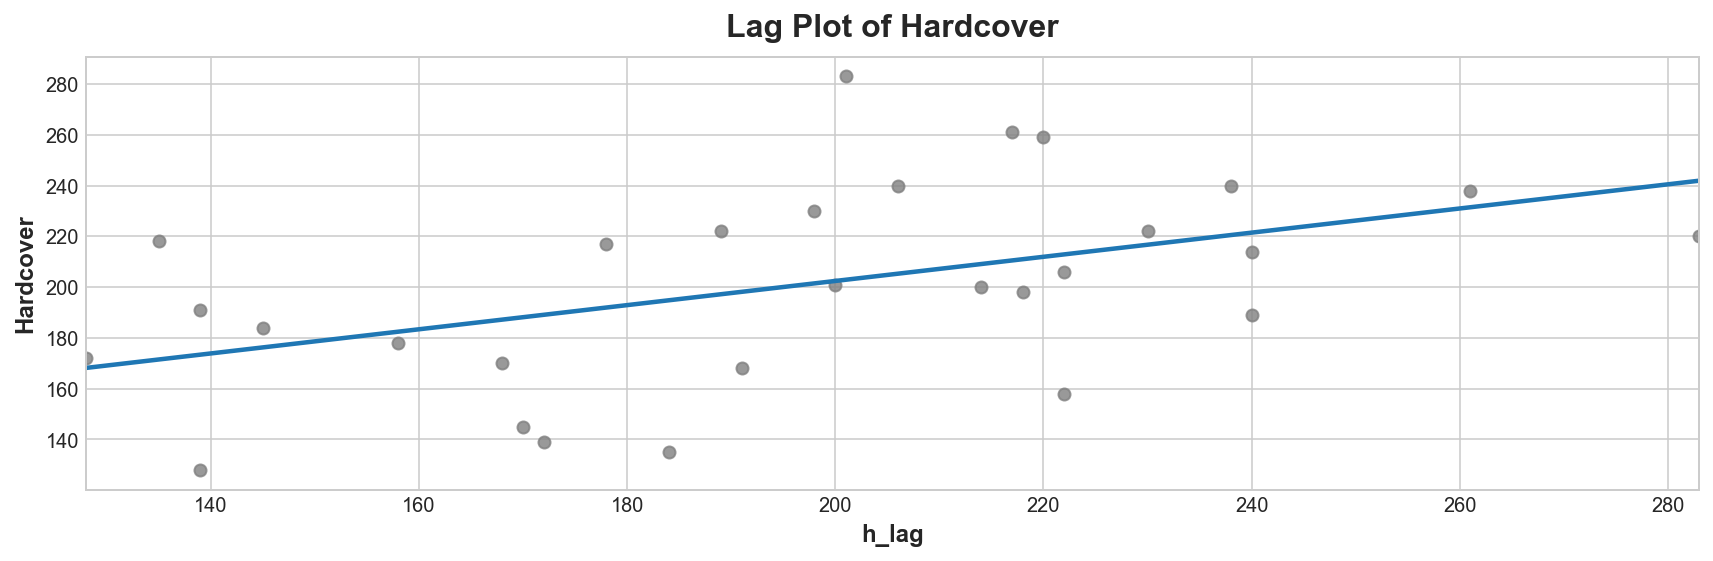

In [17]:
fig, ax = plt.subplots()
ax = sns.regplot(data=book_sales, x='h_lag', y='Hardcover', ci=None, scatter_kws=dict(color='0.5'))
ax.set_title('Lag Plot of Hardcover');

Now, import tunnel dataset and this time build linear regressions with sklearn.linear_model:

In [18]:
from warnings import simplefilter

simplefilter('ignore')

In [19]:
tunnel = pd.read_csv('C:/Users/Lenovo/Desktop/TSA_Kaggle/tunnel.csv', index_col='Day', parse_dates=True)
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [21]:
plot_params = dict(
        color='0.25',
        style='-'
)

tunnel['lag'] = tunnel.NumVehicles.shift(1)
tunnel['time'] = np.arange(len(tunnel.index))
tunnel.head()

,NumVehicles,lag,time
Day,,,
2003-11-01,103536,NaN,0
2003-11-02,92051,103536.0,1
2003-11-03,100795,92051.0,2
2003-11-04,102352,100795.0,3
2003-11-05,106569,102352.0,4


In [22]:
from sklearn.linear_model import LinearRegression

# Training data
X = tunnel.loc[:, ['time']]  # features
y = tunnel.loc[:, 'NumVehicles']  # target

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Tunnel Traffic')

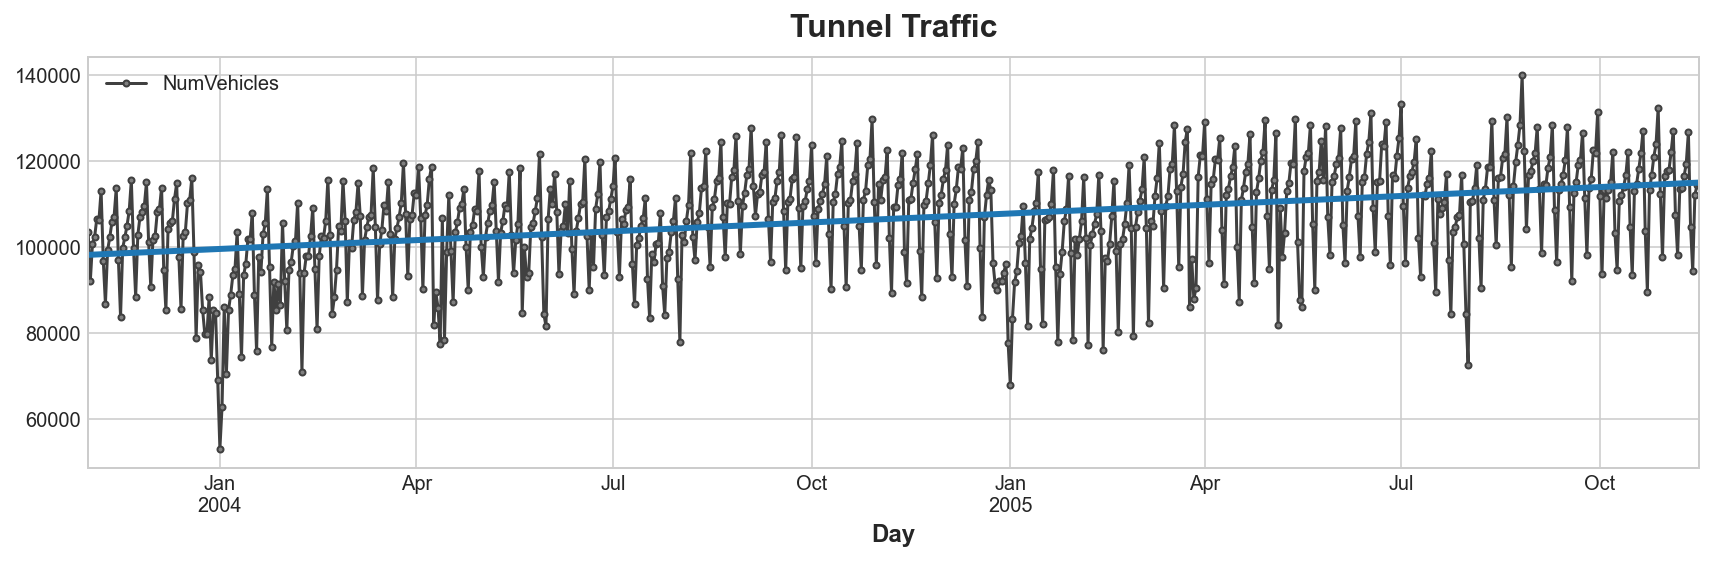

In [24]:
%config InlineBackend.figure_format = 'retina'

plot_params = dict(
    color='0.25',
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.5",
    legend=True,
)
ax = y.plot(**plot_params)
ax.plot(pred, linewidth=3)
ax.set_title('Tunnel Traffic')

Note that `LinearRegression` expects `X` to be a dataframe:

In [25]:
X = tunnel.dropna().loc[:, ['lag']]
y = tunnel.dropna().loc[:, 'NumVehicles']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [26]:
pred_lag = pd.Series(model.predict(X),
                     index = X.index
                    )

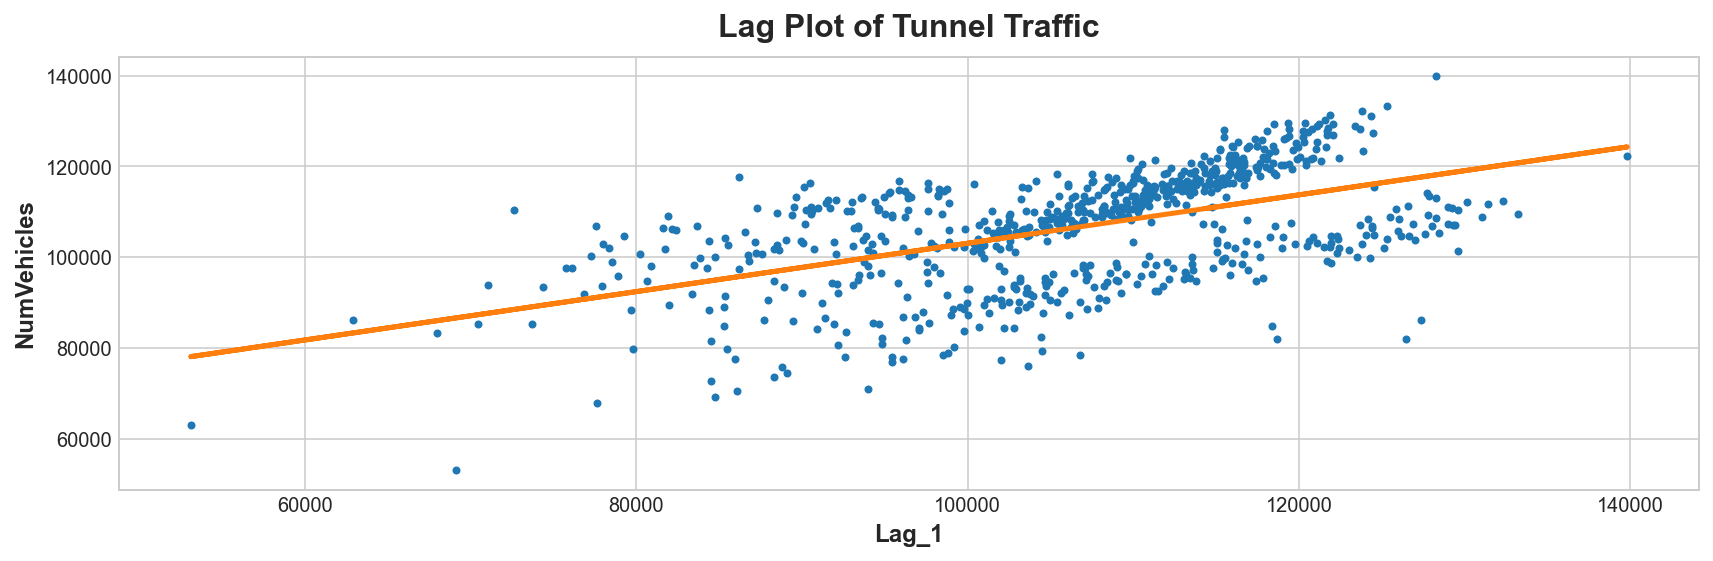

In [27]:
fig, ax = plt.subplots()

ax.plot(X.lag, y, '.')
ax.plot(X.lag, pred_lag, linewidth='2.5')
ax.set(xlabel='Lag_1', ylabel='NumVehicles', title='Lag Plot of Tunnel Traffic');

Compare predicted values with actual y on top of each other:

<AxesSubplot:xlabel='Day'>

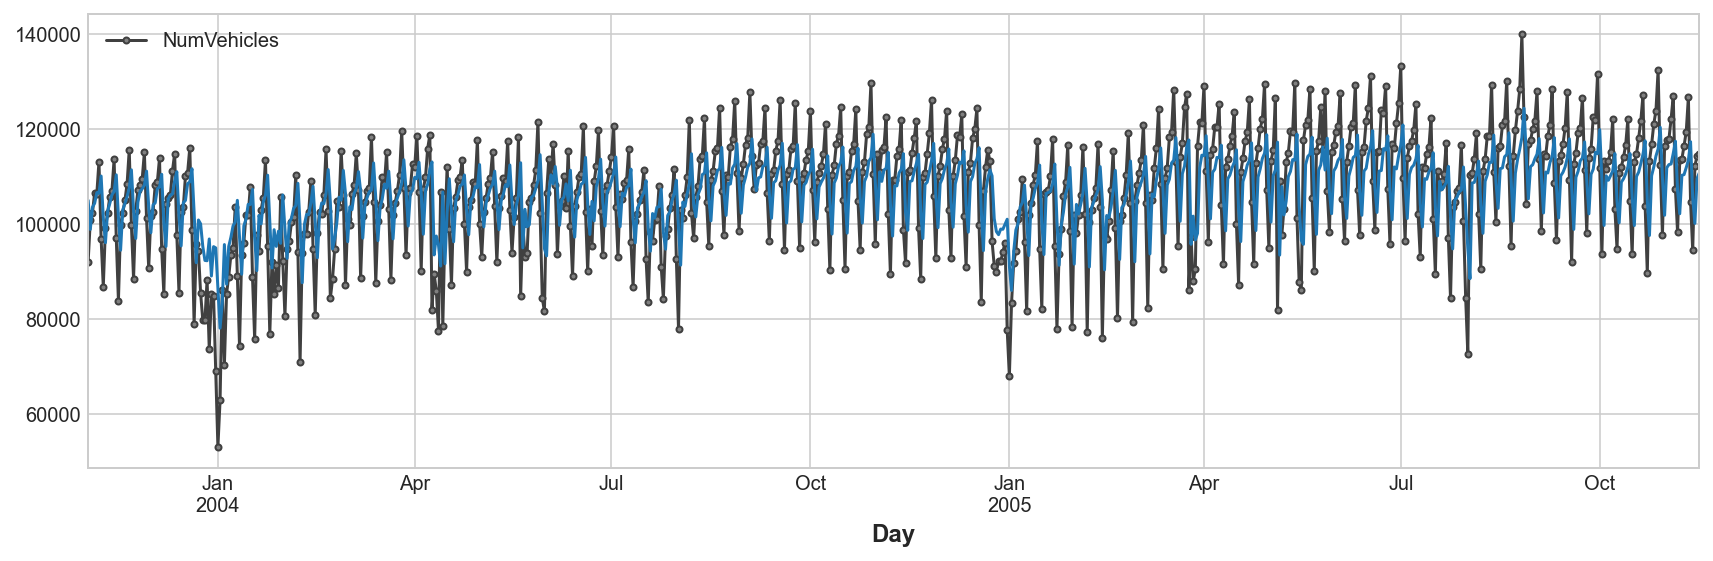

In [29]:
y.plot(**plot_params)
pred_lag.plot()